<a href="https://colab.research.google.com/github/Prog1xx1/studia/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import hashlib

import pandas as pd
import numpy as np

from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, cross_val_score, KFold, validation_curve, learning_curve
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, f1_score, plot_confusion_matrix, mean_squared_error
from sklearn.datasets import load_wine, load_diabetes, load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import svm
from sklearn import metrics
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import zipfile
import tensorflow
import seaborn 

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
seaborn.set()
tensorflow.__version__


'2.5.0'

In [ ]:
pip install tensorflow==2.5

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Krzywe ROC')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (pole = %0.2f) dla klasy %s' % (roc_auc[i], labels[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    return plt

def plot_conf_matrix(clf,X, y):
    fig_conf, ax_conf = plt.subplots(figsize=(15, 15))
    disp = plot_confusion_matrix(clf, X, y,
                             
                             cmap=plt.cm.Blues,
                             ax = ax_conf,
                             normalize='true')

    return plt

#Zbiór z https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [ ]:
zbior1 = pd.read_excel("data_banknote_authenticationR.xlsx")
zbior1
#, names = ["s","variance of Wavelet Transformed image", "skewness_of_Wavelet_Transformed_image", "curtosis_of_Wavelet_Transformed_image" , "entropy_of_image", "class"]

,variance_of_Wavelet_Transformed_image,skewness_of_Wavelet_Transformed_image,curtosis_of_Wavelet_Transformed_image,entropy_of_image,Class
0,3.621600,8.666100,-2.807300,-0.446990,0
1,4.545900,8.167400,-2.458600,-1.462100,0
2,3.866000,-2.638300,1.924200,0.106450,0
3,3.456600,9.522800,-4.011200,-3.594400,0
4,0.329240,-4.455200,4.571800,-0.988800,0
...,...,...,...,...,...
1367,0.406140,1.349200,-1.450100,-0.559490,1
1368,-1.388700,-4.877300,6.477400,0.341790,1
1369,-3.750300,-13.458600,17.593200,-2.777100,1
1370,-3.563700,-8.382700,12.393000,-1.282300,1


In [ ]:
zbior1.sample(5)

,variance_of_Wavelet_Transformed_image,skewness_of_Wavelet_Transformed_image,curtosis_of_Wavelet_Transformed_image,entropy_of_image,Class
1156,0.967080,3.842600,-4.931400,-4.132300,1
810,-0.643260,2.474800,-2.945200,-1.027600,1
873,-2.217300,1.467100,-0.726890,-1.172400,1
1326,-1.294300,2.673500,-0.840850,-2.032300,1
1210,0.025013,3.399800,-4.432700,-4.265500,1


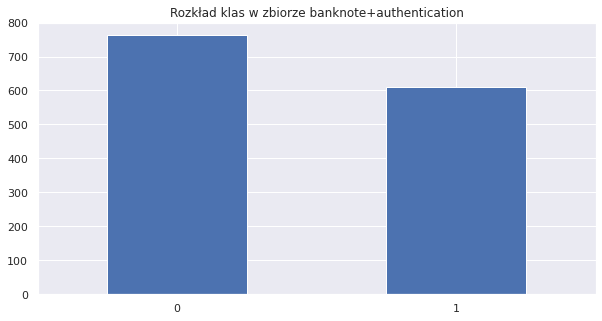

In [ ]:
zbior1.Class.value_counts(dropna=False).plot(
    kind='bar',
    rot=0,
    title='Rozkład klas w zbiorze banknote+authentication',
    figsize=(10, 5)
)

In [ ]:
dane_do_treningu, dane_do_testowania = train_test_split(zbior1, test_size=0.2)

In [ ]:
le_zbior = LabelEncoder()

trening_label = le_zbior.fit_transform(dane_do_treningu['Class'].values)
test_label = le_zbior.transform(dane_do_testowania['Class'].values)

In [ ]:
dane_do_treningu = dane_do_treningu.drop(['Class'], axis=1).reset_index().drop('index', axis=1)
dane_do_testowania = dane_do_testowania.drop(['Class'], axis=1).reset_index().drop('index', axis=1)

NameError: ignored

#Zbiór 2 : https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

In [ ]:
zbior2 = pd.read_excel("Dry_Bean_Dataset.xlsx")
zbior2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291000,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018000,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110000,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884000,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134000,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696000,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499000,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321000,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779000,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
zbior2.loc[zbior2["Class"] == "SEKER" , "Class"] = 1
zbior2.loc[zbior2["Class"] == "BARBUNYA" , "Class"] = 2
zbior2.loc[zbior2["Class"] == "BOMBAY" , "Class"] = 3
zbior2.loc[zbior2["Class"] == "CALI" , "Class"] = 4
zbior2.loc[zbior2["Class"] == "HOROZ" , "Class"] = 5
zbior2.loc[zbior2["Class"] == "SIRA" , "Class"] = 6
zbior2.loc[zbior2["Class"] == "DERMASON" , "Class"] = 7

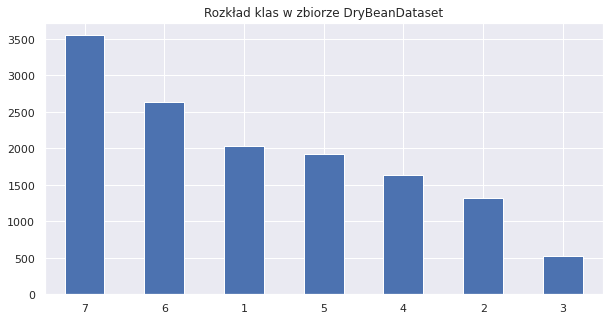

In [ ]:
zbior2.Class.value_counts(dropna=False).plot(
    kind='bar',
    rot=0,
    title='Rozkład klas w zbiorze DryBeanDataset',
    figsize=(10, 5)
)

In [ ]:
dane_do_treningu2, dane_do_testowania2 = train_test_split(zbior2, test_size=0.2)

In [ ]:
le_zbior2 = LabelEncoder()

trening_label2 = le_zbior2.fit_transform(dane_do_treningu2['Class'].values)
test_label2 = le_zbior2.transform(dane_do_testowania2['Class'].values)

In [ ]:
dane_do_treningu2 = dane_do_treningu2.drop(['Class'], axis=1).reset_index().drop('index', axis=1)
dane_do_testowania2 = dane_do_testowania2.drop(['Class'], axis=1).reset_index().drop('index', axis=1)

#SVM

In [ ]:
first2 = svm.SVC(C=0.00004294966208076843, kernel='linear', degree=1, gamma=0.001, coef0=0.0, shrinking=True, probability=True,tol=0.001, cache_size=12000, class_weight=None, verbose=False, max_iter=100000, random_state=10)
first2.fit(dane_do_treningu2, trening_label2)
predykcja = first2.predict(dane_do_testowania2)
acc = metrics.accuracy_score(test_label2, predykcja)
print(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.82959970620639


In [ ]:
labels = le_zbior2.classes_
#plot_multiclass_roc(first2, dane_do_testowania2, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

In [ ]:
first = svm.SVC(C=0.0004294966208076843, kernel='linear', degree=1, gamma=0.001, coef0=0.0, shrinking=True, probability=True,tol=0.001, cache_size=12000, class_weight=None, verbose=False, max_iter=100000, random_state=10)
first.fit(dane_do_treningu, trening_label)
predykcja = first.predict(dane_do_testowania)
acc = metrics.accuracy_score(test_label, predykcja)
print(acc)

0.9854545454545455


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


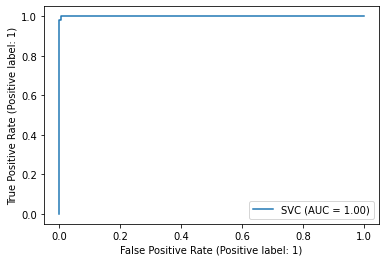

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(first, dane_do_testowania,test_label)
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

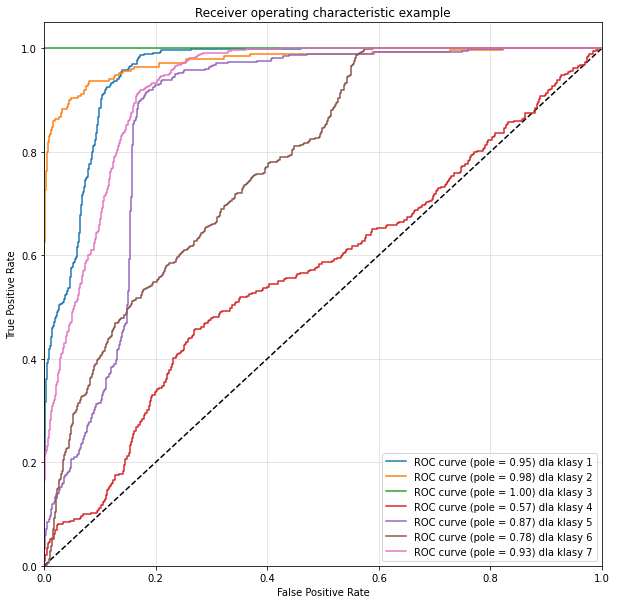

In [ ]:
plot_multiclass_roc(first2, dane_do_testowania2, test_label2, len(zbior2.Class.unique()), figsize=(10, 10))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

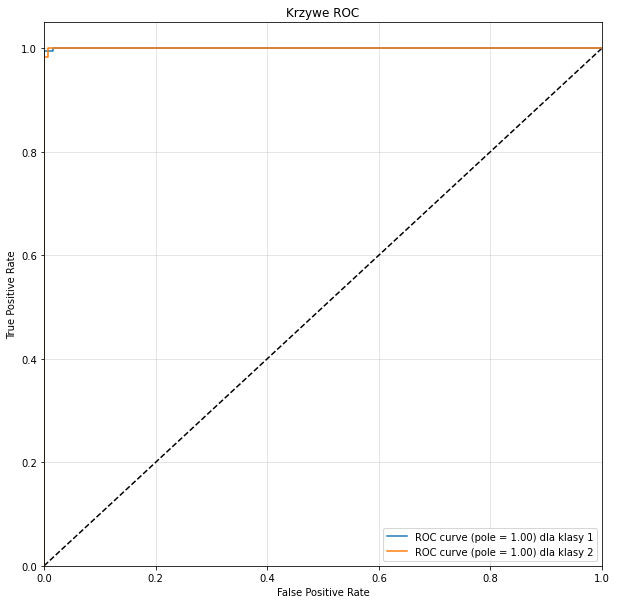

In [ ]:
plot_multiclass_roc(first, dane_do_testowania, test_label, len(zbior1.Class.unique()), figsize=(10, 10))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

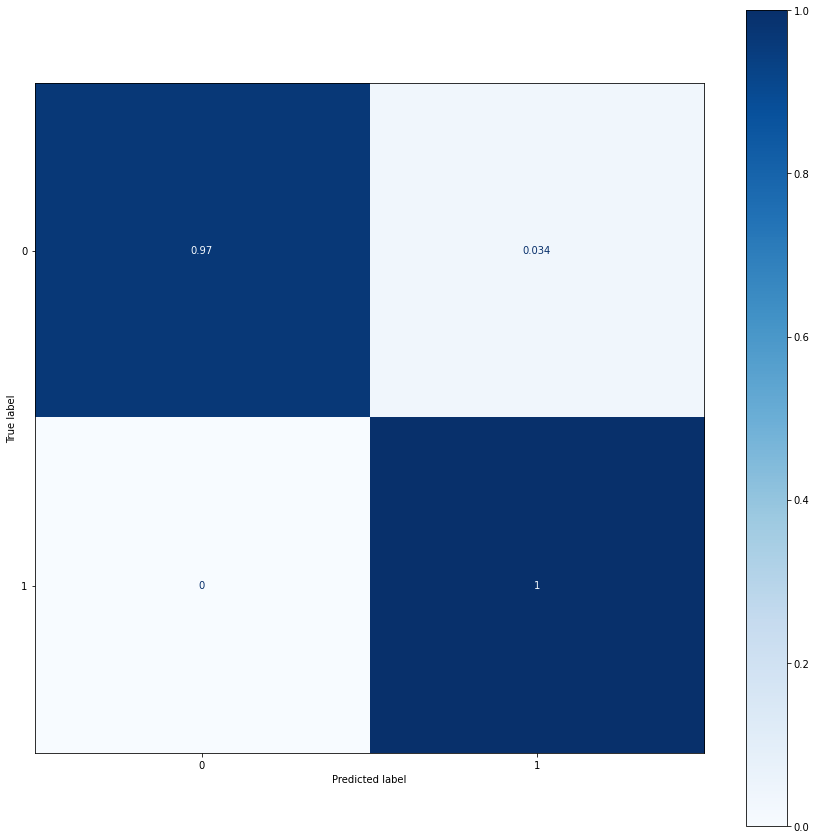

In [ ]:
plot_conf_matrix(first, dane_do_testowania, test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

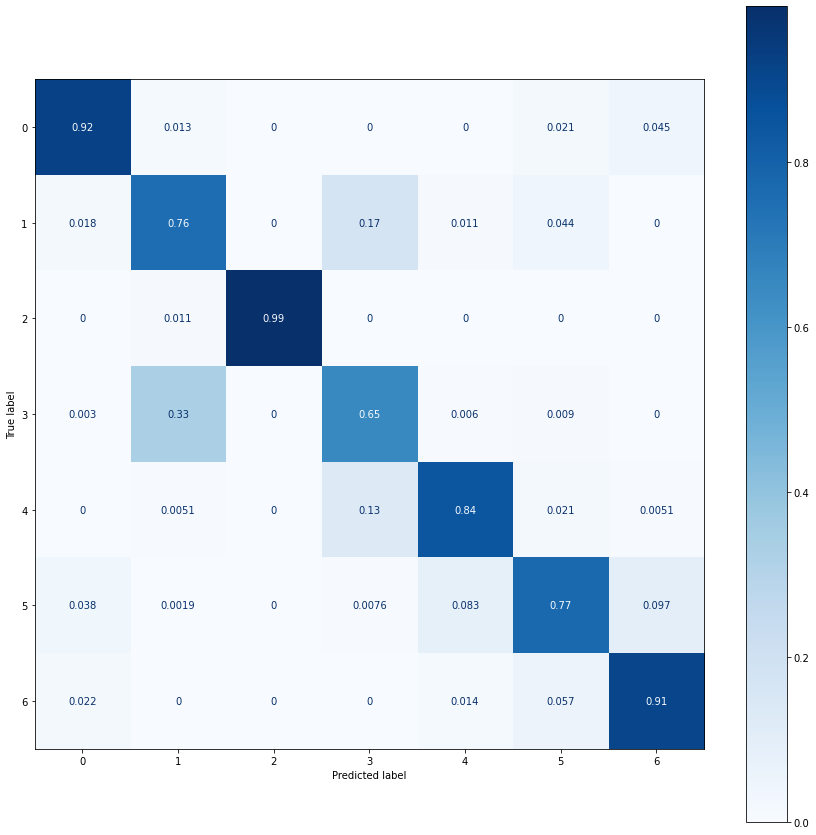

In [ ]:
plot_conf_matrix(first2, dane_do_testowania2, test_label2)

#XGBC

In [ ]:
xgbc = xgb.XGBClassifier()
xgbc.fit(dane_do_treningu, trening_label)
score = xgbc.score(dane_do_testowania, test_label)
print(score)

0.9854545454545455


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

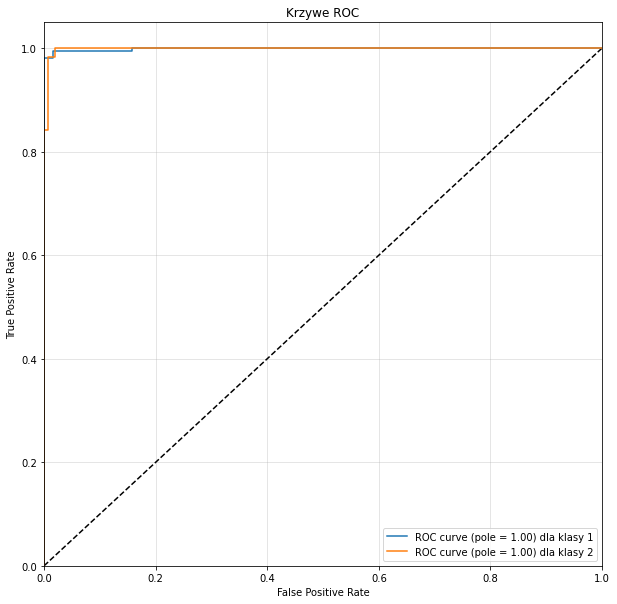

In [ ]:
plot_multiclass_roc(xgbc, dane_do_testowania, test_label, len(zbior1.Class.unique()), figsize=(10, 10))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

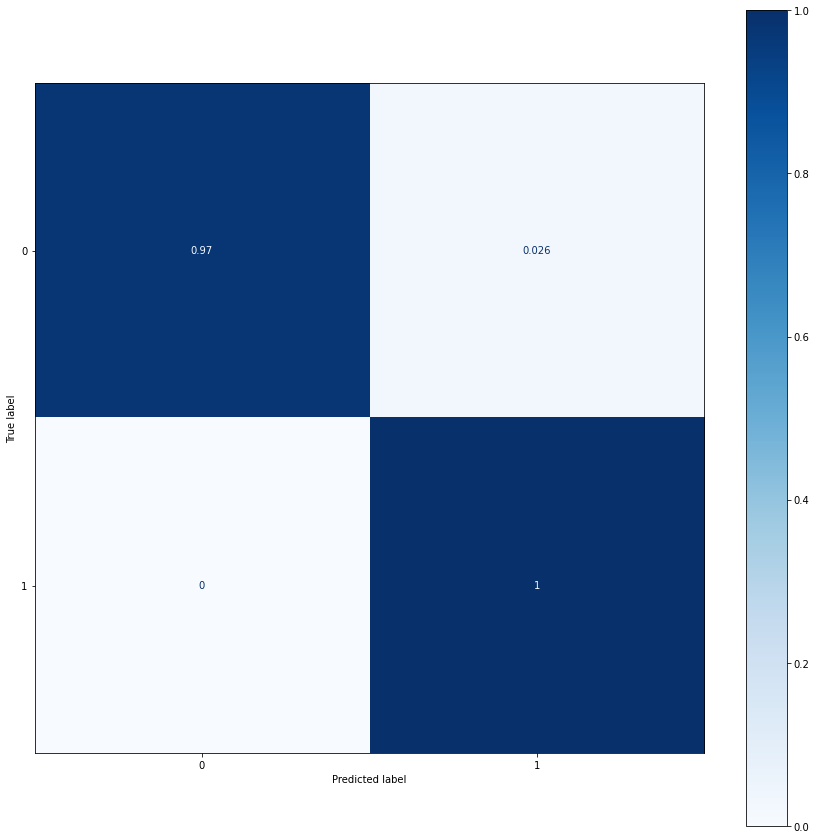

In [ ]:
plot_conf_matrix(first, dane_do_testowania, test_label)

In [ ]:
xgbc2 = xgb.XGBClassifier()
xgbc2.fit(dane_do_treningu2, trening_label2)
score2 = xgbc2.score(dane_do_testowania2, test_label2)
print(score2)

0.9313257436650753


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

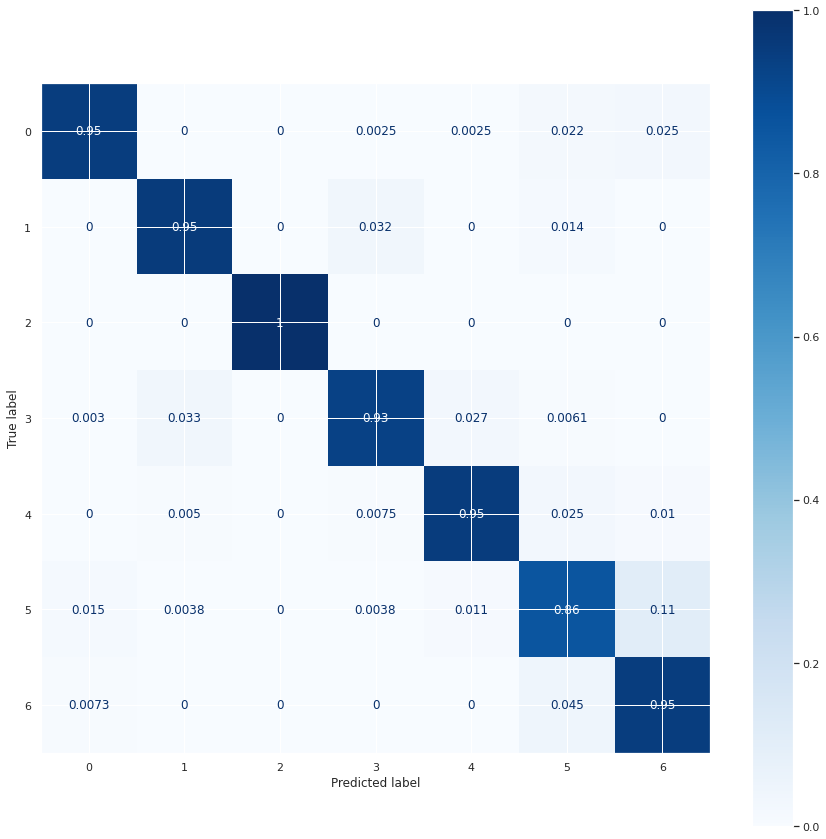

In [ ]:
plot_conf_matrix(xgbc2, dane_do_testowania2, test_label2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

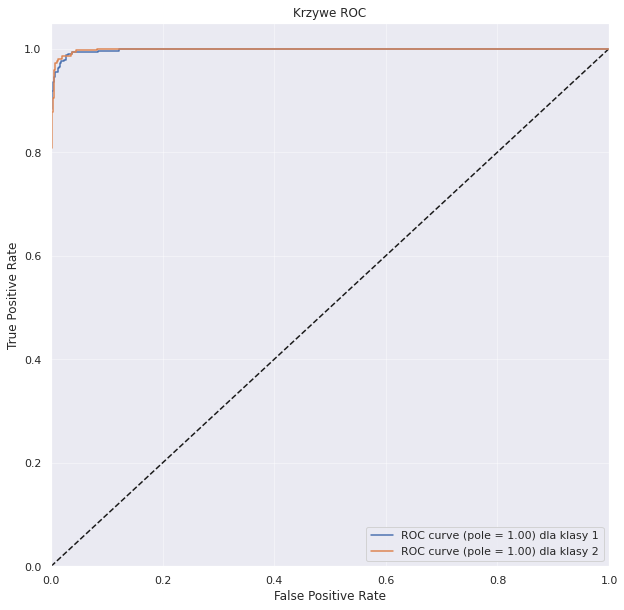

In [ ]:
plot_multiclass_roc(xgbc2, dane_do_testowania2, test_label2, len(zbior1.Class.unique()), figsize=(10, 10))

# Grupowanie

In [ ]:
pca = PCA(2)

In [ ]:
pca_bi = pca.fit_transform(zbior1)

In [ ]:
pca_cl = pca.fit_transform(zbior2)

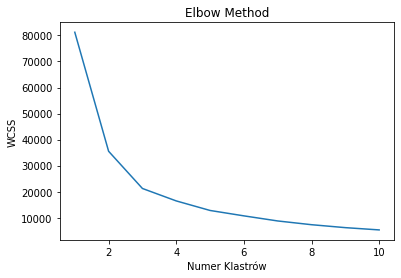

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=10)
    kmeans.fit(pca_bi)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numer Klastrów')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_bi = KMeans(n_clusters=2)

In [ ]:
kmeans_bi.fit(pca_bi)

KMeans(n_clusters=2)

In [ ]:
y_km_bi = kmeans_bi.predict(pca_bi)

In [ ]:
gru_km_bi = np.unique(y_km_bi)

In [ ]:
print(gru_km_bi)

[0 1]


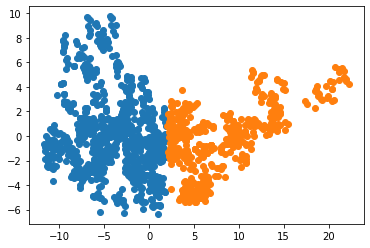

In [ ]:
for cluster in gru_km_bi:
	row_ix = np.where(y_km_bi == cluster)
	# create scatter of these samples
	pyplot.scatter(pca_bi[row_ix, 0], pca_bi[row_ix, 1])
# show the plot
pyplot.show()

Drugi zbior

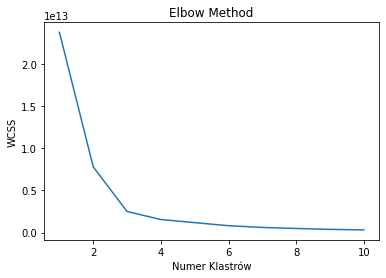

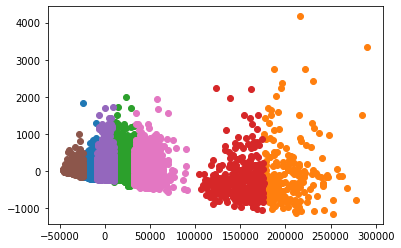

In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=10)
    kmeans.fit(pca_cl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numer Klastrów')
plt.ylabel('WCSS')
plt.show()

kmeans_cl = KMeans(n_clusters=7)

kmeans_cl.fit(pca_cl)

y_km_cl = kmeans_cl.predict(pca_cl)

gru_km_cl = np.unique(y_km_cl)

for cluster in gru_km_cl:
	row_ix = np.where(y_km_cl == cluster)
	# create scatter of these samples
	pyplot.scatter(pca_cl[row_ix, 0], pca_cl[row_ix, 1])
# show the plot
pyplot.show()